In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
df.shape

(1460, 81)

Text(0.5, 1.0, 'Correlation between variables')

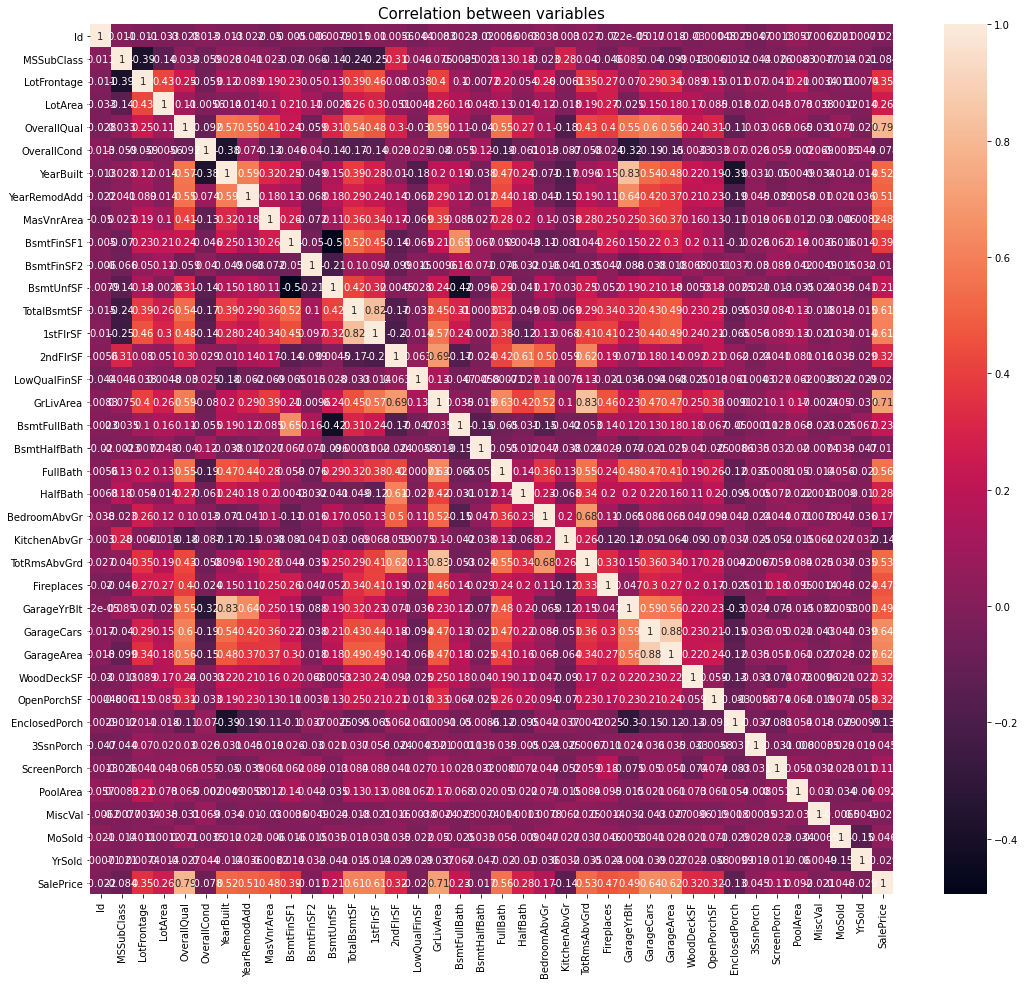

In [6]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between variables',size=15)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Dropping Id since it represents the Index

In [8]:
df.drop('Id',inplace=True,axis=1)

In [9]:
df_cat=df.select_dtypes('object')

In [10]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


##Feature Selection

Selecting the catagorical variables based on the dataset. 
Selecting the numerical dataset based on correlation between the target variable.

In [11]:
df_cat_fea=['MSZoning','Street','LotShape','LandSlope','Neighborhood',
           'Electrical','Heating','CentralAir','Functional']

In [12]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | 
                                                 (df.corr()["SalePrice"]<-0.50)].index)

In [13]:
df=df[important_num_cols+df_cat_fea]

Treating the null values

In [57]:
df.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
MSZoning        0
Street          0
LotShape        0
LandSlope       0
Neighborhood    0
Electrical      1
Heating         0
CentralAir      0
Functional      0
dtype: int64

In [ ]:
df.dropna(subset=['Electrical'],inplace=True,axis=1)

Checking for null values

In [15]:
df1=df.copy()

To avoid data leakage preprocessing steps are done separately for train and test data.

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score

In [17]:
df1.drop('SalePrice',inplace=True,axis=1)

In [18]:
x=df1

In [19]:
y=df['SalePrice']

In [20]:
x=pd.DataFrame(x)

In [21]:
x=pd.get_dummies(x)

In [22]:
x

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,1,0,0,0,0,0,0,1
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,0,0,1,0,0,0,0,0,0,1
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,1,0,0,0,0,0,0,1
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,0,1,0,0,0,0,0,0,1
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,0,0,1,0,0,0,0,0,0,1
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,0,0,1,0,0,1,0,0,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,1,0,0,0,0,0,0,1
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,1,0,0,0,0,0,0,1


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 69)
(438, 69)
(1022,)
(438,)


Preprocessing the Training dataset

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [26]:
scaler=ss.fit_transform(x_train)

In [27]:
x_train=pd.DataFrame(scaler,columns=[x_train])

In [28]:
x_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,-0.802130,-0.205082,-0.939349,0.000665,-0.258524,-0.863652,-1.022458,-0.340849,0.316990,0.200808,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
1,0.636075,1.151191,1.045453,0.262396,0.085293,-0.602838,0.810791,-0.340849,0.316990,0.747941,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
2,0.636075,0.621914,0.319306,-0.373564,0.681242,-0.150759,0.810791,-0.340849,0.316990,1.154783,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
3,1.355177,1.184271,1.093863,0.902947,0.742365,-0.104392,0.810791,0.269217,1.644711,0.645061,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
4,1.355177,1.151191,1.045453,0.955753,0.800942,-0.059957,0.810791,0.269217,0.316990,1.421335,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,-0.083027,-0.403561,-1.229808,0.411628,0.197352,-0.517832,-1.022458,0.269217,0.316990,0.261601,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
1018,2.074279,1.118111,0.997043,1.403450,1.297566,0.316775,0.810791,-0.340849,0.316990,0.429949,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
1019,0.636075,0.919632,0.706584,0.822591,0.653228,-0.172011,0.810791,-0.340849,0.316990,0.906937,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307
1020,-0.802130,-0.337401,0.464535,-0.368972,0.156603,-0.548743,-1.022458,-0.340849,-1.010731,-0.860722,...,-0.054259,-0.264872,0.264872,-0.099405,-0.031296,-0.122048,-0.164729,-0.099405,0.0,0.256307


Preprocessing the testing Data

In [29]:
scaler=ss.fit_transform(x_test)

In [30]:
x_test=pd.DataFrame(scaler,columns=[x_test])

In [31]:
x_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Heating_Wall,CentralAir_N,CentralAir_Y,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,-2.246761,-0.645313,-1.651362,-2.304318,-0.515781,-1.033400,-1.035175,-1.526574,0.299253,0.247683,...,-0.047836,3.826599,-3.826599,-0.096003,-0.096003,5.135660,-0.127441,-0.107459,-0.047836,-3.292087
1,0.688605,-1.542185,0.197381,-0.662523,-0.818387,0.250981,-1.035175,-0.266179,0.299253,0.332008,...,-0.047836,-0.261329,0.261329,-0.096003,-0.096003,-0.194717,-0.127441,-0.107459,-0.047836,0.303759
2,-0.045237,0.882689,0.586591,-0.513679,-0.683295,0.536604,0.742890,0.364018,0.299253,0.332008,...,-0.047836,-0.261329,0.261329,-0.096003,-0.096003,-0.194717,-0.127441,-0.107459,-0.047836,0.303759
3,-0.045237,1.148429,1.024451,-0.915107,-1.401986,-0.171003,0.742890,-0.266179,0.299253,-0.202054,...,-0.047836,-0.261329,0.261329,-0.096003,-0.096003,-0.194717,-0.127441,-0.107459,-0.047836,0.303759
4,-1.512919,0.019036,-0.678339,-0.355814,-0.731928,-1.180818,-1.035175,-0.896377,0.299253,0.472551,...,-0.047836,-0.261329,0.261329,-0.096003,-0.096003,-0.194717,-0.127441,-0.107459,-0.047836,0.303759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,-0.045237,-1.176793,-1.748664,0.095229,0.084029,0.247296,-1.035175,-0.266179,-1.066088,-1.101528,...,-0.047836,-0.261329,0.261329,-0.096003,10.416333,-0.194717,-0.127441,-0.107459,-0.047836,-3.292087
434,0.688605,-2.040447,0.343335,-0.662523,0.002973,0.947532,-1.035175,0.994216,0.299253,0.266422,...,-0.047836,3.826599,-3.826599,-0.096003,-0.096003,-0.194717,-0.127441,-0.107459,-0.047836,0.303759
435,-0.779078,-0.479226,0.489288,0.834938,0.694645,-0.207858,-1.035175,-0.896377,0.299253,0.247683,...,-0.047836,-0.261329,0.261329,-0.096003,-0.096003,-0.194717,-0.127441,9.305912,-0.047836,-3.292087
436,-0.779078,-0.479226,-1.408106,0.659032,0.483902,-0.351591,-1.035175,-0.896377,-1.066088,-0.848551,...,-0.047836,-0.261329,0.261329,-0.096003,-0.096003,-0.194717,-0.127441,-0.107459,-0.047836,0.303759


Defining Evaluvation Functions

In [32]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

Models

In [33]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [36]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", round(r_squared,4))
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.0095567184260634e+17
MSE: 7.568824327840853e+34
RMSE: 2.7511496374862733e+17
R2 Score: -9.661679218073409e+24
------------------------------
RMSE Cross-Validation: 35779.63170396726


Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

In [38]:
ridge = Ridge()
ridge.fit(x_train, y_train)
predictions = ridge.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23455.365582533683
MSE: 1624981505.417375
RMSE: 40311.05934377531
R2 Score: 0.7925695014099577
------------------------------
RMSE Cross-Validation: 35639.5928182458


Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso()
lasso.fit(x_train, y_train)
predictions = lasso.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23467.767367702956
MSE: 1624978832.194961
RMSE: 40311.02618632973
R2 Score: 0.7925698426494465
------------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30889401111.650513, tolerance: 577631433.5745794
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26899650403.247803, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3403543537.7595215, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

RMSE Cross-Validation: 35770.72614106292


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19571356539.369873, tolerance: 724930391.3116124
  model = cd_fast.enet_coordinate_descent(


Elastic net

In [41]:
from sklearn.linear_model import ElasticNet

In [42]:
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
predictions = elastic_net.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23005.497576787922
MSE: 1796743957.1277869
RMSE: 42388.01666895712
R2 Score: 0.7706438543311699
------------------------------
RMSE Cross-Validation: 38269.409388408756


Support vector machines

In [43]:
from sklearn.svm import SVR

In [44]:
svr = SVR(C=100000)
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 22603.699088549394
MSE: 1878173307.7793198
RMSE: 43337.89690074173
R2 Score: 0.7602493170707767
------------------------------
RMSE Cross-Validation: 39261.49244252119


Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20119.799139396244
MSE: 1482652192.2474923
RMSE: 38505.22292166989
R2 Score: 0.810737979202709
------------------------------
RMSE Cross-Validation: 31171.38197642644


Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(x_train)
X_test_2d = poly_reg.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 7653492868877.131
MSE: 1.2880370820027736e+27
RMSE: 35889233510939.93
R2 Score: -1.6441920922273757e+17
------------------------------
RMSE Cross-Validation: 35779.63170396726


Model Comparison

In [49]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,RandomForestRegressor,2.011980e+04,1.482652e+09,3.850522e+04,8.107380e-01,31171.381976
1,Ridge,2.345537e+04,1.624982e+09,4.031106e+04,7.925695e-01,35639.592818
2,Lasso,2.346777e+04,1.624979e+09,4.031103e+04,7.925698e-01,35770.726141
0,LinearRegression,1.009557e+17,7.568824e+34,2.751150e+17,-9.661679e+24,35779.631704
6,Polynomial Regression (degree=2),7.653493e+12,1.288037e+27,3.588923e+13,-1.644192e+17,35779.631704
3,ElasticNet,2.300550e+04,1.796744e+09,4.238802e+04,7.706439e-01,38269.409388
4,SVR,2.260370e+04,1.878173e+09,4.333790e+04,7.602493e-01,39261.492443


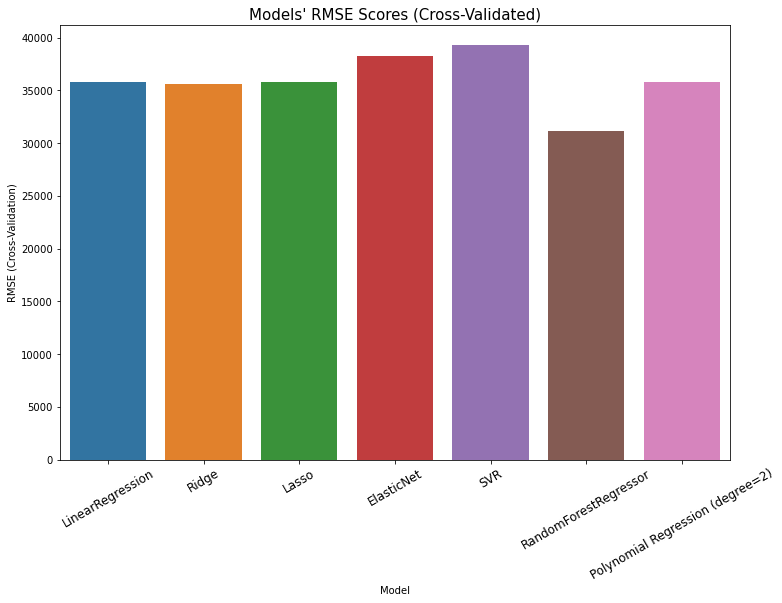

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()